# Random numbers

## Objectives

* Understand the limitations of random number generators
* Know how to seed and use a random number generator

Section 4.1 and 4.2 from class book.

## A word about Magics

## Project plans

Today is project selection day! We'll go over the possible projects then. You'll have a little time to think about it before selecting one. **Please send me or post on ecampus your project selection ideas!**

The projects are individual!!

We have already discussed how to set the project but go over those notes again.  


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Initial words

Most of what we'll be covering is "random numbers" for data science, not cryptography.

Now we will discuss how random numbers are generated in a computer. The idea is to generate a sequence of number $r_1,r_2,\cdots$ which looks random (no correlations between them) but in reality they are "pseudo random". This means that they are not obtained like those that you obtain from rolling a dice or playing lotery. 

If all the numbers in the sequence are likely to occur, they come from a uniform probability distribution. We will see later how we can obtain numbers with other distributions.

To start, let us see the first random number generator. It is based on the power residue method and it generates random numbers $0 \le r_i \le M-1$.

In [47]:
# Take the previous number number, multiply by a, add c and take the remainder

print(4%3)

# Observe that the remainder operation takes "the last part of the number", which are like the 
#"round-off" error

def lin_cong(c, a, M, r_i):
    return (a * r_i + c) % M

1


In [48]:
lin_cong(c=1, a=4, M=9, r_i=3)

4

In [49]:
ri=lin_cong(c=1, a=4, M=9, r_i=4)
print(ri)

8


In [50]:
#Observe that numbers repeat from i=9 (=M).
for i in range(12):
    ri=ri=lin_cong(c=1, a=4, M=9, r_i=ri)
    print(i,ri)

0 6
1 7
2 2
3 0
4 1
5 5
6 3
7 4
8 8
9 6
10 7
11 2


In [51]:
# This function is a generator function that yields 1 for the first time, 
# 2 second time and 3 third time 
def iterator():
    yield 1
    yield 2
    yield 3

In [52]:
for item in iterator():
    print(item)

1
2
3


In [53]:
tuple(iterator())

(1, 2, 3)

In [54]:
def lin_cong_iter(c, a, M, r_0):
    r_i = r_0

    while True:
        yield r_i
        r_i = lin_cong(c, a, M, r_i)
        if r_i == r_0:
            return

In [56]:
vals=list(lin_cong_iter(1, 4, 9, 3))
print(vals)
print(vals[::2], vals[1::2])

[3, 4, 8, 6, 7, 2, 0, 1, 5]
[3, 8, 7, 0, 5] [4, 6, 2, 1]


In [31]:
list(i / 8 for i in lin_cong_iter(1, 4, 9, 3))

[0.375, 0.5, 1.0, 0.75, 0.875, 0.25, 0.0, 0.125, 0.625]

In [57]:
#if we want random numbers in a different interval, for example between [A,B]
# we use x_i = A+(B-A)*r_i   (where r_i is normalized)
rs=np.array(list(i / 8 for i in lin_cong_iter(1, 4, 9, 3)))
A=8
B=12
print(8+(B-A)*rs)

[ 9.5 10.  12.  11.  11.5  9.   8.   8.5 10.5]


Try it out:

Set `a=57, c=1, M=256, r_0=10` (like in the book) and see what happens.

You will see that this is what we call "a bad generator".

In [58]:
vals = list(lin_cong_iter(a=57, c=1, M=256, r_0=10))
print(len(vals))

256


In [63]:
#generate 256 numbers between 0 and 255
real_rand = np.random.randint(0, 256, 256)

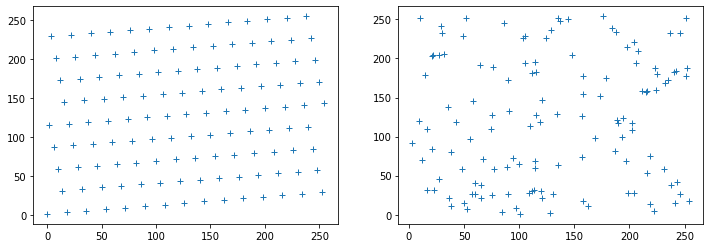

In [66]:
#You always need to check if the numbers you will be using "looks random". In a 32 bit computer
# M = 2^31. Important to know if you do simulations that require more numbers than this.
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(vals[::2], vals[1::2], "+")
axs[1].plot(real_rand[::2], real_rand[1::2], "+")
plt.show()

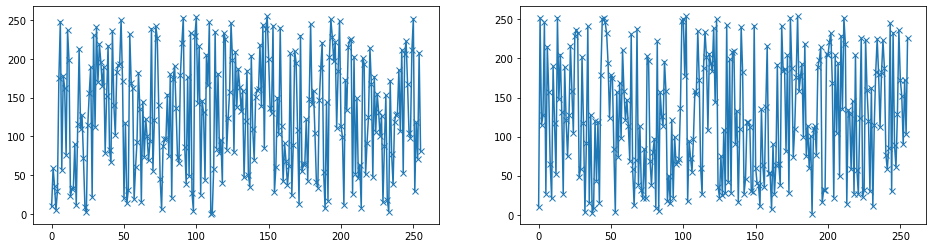

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(range(256), vals, "x-")
axs[1].plot(range(256), real_rand, "x-")
plt.show()

## Python random numbers

Since the book mentions Python's random numbers, let's look at that first. Once you know how they work, it really doesn't matter which library you use except for speed and simplicity (and then go with Numpy, of course).

In [67]:
import random

In [68]:
random.seed(42)

In [69]:
for i in range(10):
    print(random.randint(0, 256))

57
12
140
125
114
71
52
44
216
16


## Numpy random numbers

Let's try the same with Numpy:

In [70]:
np.random.seed(42)

In [71]:
np.random.randint(0, 256, 10)

array([102, 179,  92,  14, 106,  71, 188,  20, 102, 121])

In [72]:
#Randomstate from different probability distributions
state1 = np.random.RandomState(42)

In [77]:
np.random.seed(1234)
print(np.random.uniform(0, 10, 5))
r = np.random.RandomState(1234)
print(r.uniform(0, 10, 5))

[1.9151945  6.22108771 4.37727739 7.85358584 7.79975808]
[1.9151945  6.22108771 4.37727739 7.85358584 7.79975808]


In [78]:
state1.randint(0, 256)

102

In [79]:
np.random.seed(42)
rsamp = np.random.rand(1000)

In [80]:
rsamp[:100]

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
       0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
       0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914,
       0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
       0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041,
       0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203,
       0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249,
       0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998,
       0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446,
       0.96958463, 0.77513282, 0.93949894, 0.89482735, 0.59789998,
       0.92187424, 0.0884925 , 0.19598286, 0.04522729, 0.32533033,
       0.38867729, 0.27134903, 0.82873751, 0.35675333, 0.28093451,
       0.54269608, 0.14092422, 0.80219698, 0.07455064, 0.98688694,
       0.77224477, 0.19871568, 0.00552212, 0.81546143, 0.70685

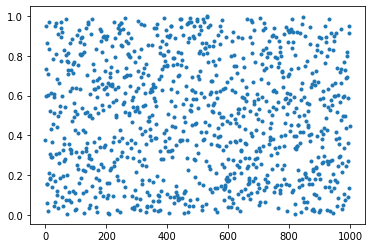

In [81]:
plt.plot(rsamp, ".")

A simple test to check uniformity is to evaluate the kth momentum of the distribution;
$$
\langle x^k \rangle = \frac{1}{N} \sum_{i=1}^N x_i^k
$$
If the numbers are distributed uniformly, it follows that

$$
\frac{1}{N} \sum_{i=1}^N x_i^k \approx \int_0^1 dx x^k P(x) \approx \frac{1}{k+1} + O\left(\frac{1}{\sqrt{N}}\right)
$$

In [82]:
N = len(rsamp)
moment1 = 1 / N * np.sum(rsamp ** 1)
moment2 = 1 / N * np.sum(rsamp ** 2)
moment3 = 1 / N * np.sum(rsamp ** 3)
print(f"moment 1: {moment1} == {1/(1+1)} +/- {1/np.sqrt(N)}")
print(f"moment 2: {moment2} == {1/(1+2)} +/- {1/np.sqrt(N)}")
print(f"moment 3: {moment3} == {1/(1+3)} +/- {1/np.sqrt(N)}")

moment 1: 0.4902565533201336 == 0.5 +/- 0.03162277660168379
moment 2: 0.32561038208072784 == 0.3333333333333333 +/- 0.03162277660168379
moment 3: 0.24419564872034066 == 0.25 +/- 0.03162277660168379


Another method to check the uniformity is to determinate the near-neighbor correlation as
$$
C(k) = \frac{1}{N} \sum_{i=1}^N x_i x_{i+k}
$$
If the numbers are distributed uniformly, you should get that
$$
\sum_{i=1}^N x_i x_{i+k} \approx \int_0^1 dx \int_0^1 dy x y P(x,y) = \frac{1}{4}
$$

In [89]:
#shift of numbers by -2
np.roll(np.arange(10), -2)

array([2, 3, 4, 5, 6, 7, 8, 9, 0, 1])

In [84]:
1 / N * np.sum(rsamp * np.roll(rsamp, 1))

0.24342288997134198

In [85]:
1 / N * np.sum(rsamp * np.roll(rsamp, 2))

0.23859331190762423

In [86]:
1 / N * np.sum(rsamp * np.roll(rsamp, 3))

0.23911773041052464

In [87]:
1 / N * np.sum(rsamp * np.roll(rsamp, 4))

0.24079646978602764

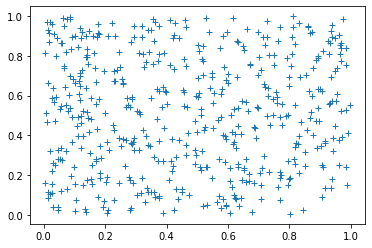

In [90]:
fig, ax = plt.subplots()
ax.plot(rsamp[::2], rsamp[1::2], "+")
plt.show()